# Breast Cancer Diagnosis - Data Analysis & Prediction

This notebook explores the Breast Cancer Wisconsin Diagnostic dataset. The goal is to understand the key features that differentiate malignant from benign tumors and to build a machine learning model to classify them.

In [594]:
# Loading the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [595]:
# reading the dataset csv file using pandas
df = pd.read_csv('Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploratory Data Analysis (EDA)

In [597]:
# Checking for null values in the data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [598]:
# Checking the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [599]:
# Removing the column that is not relevent
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [600]:
# Seeing the unique values of the object datatype
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

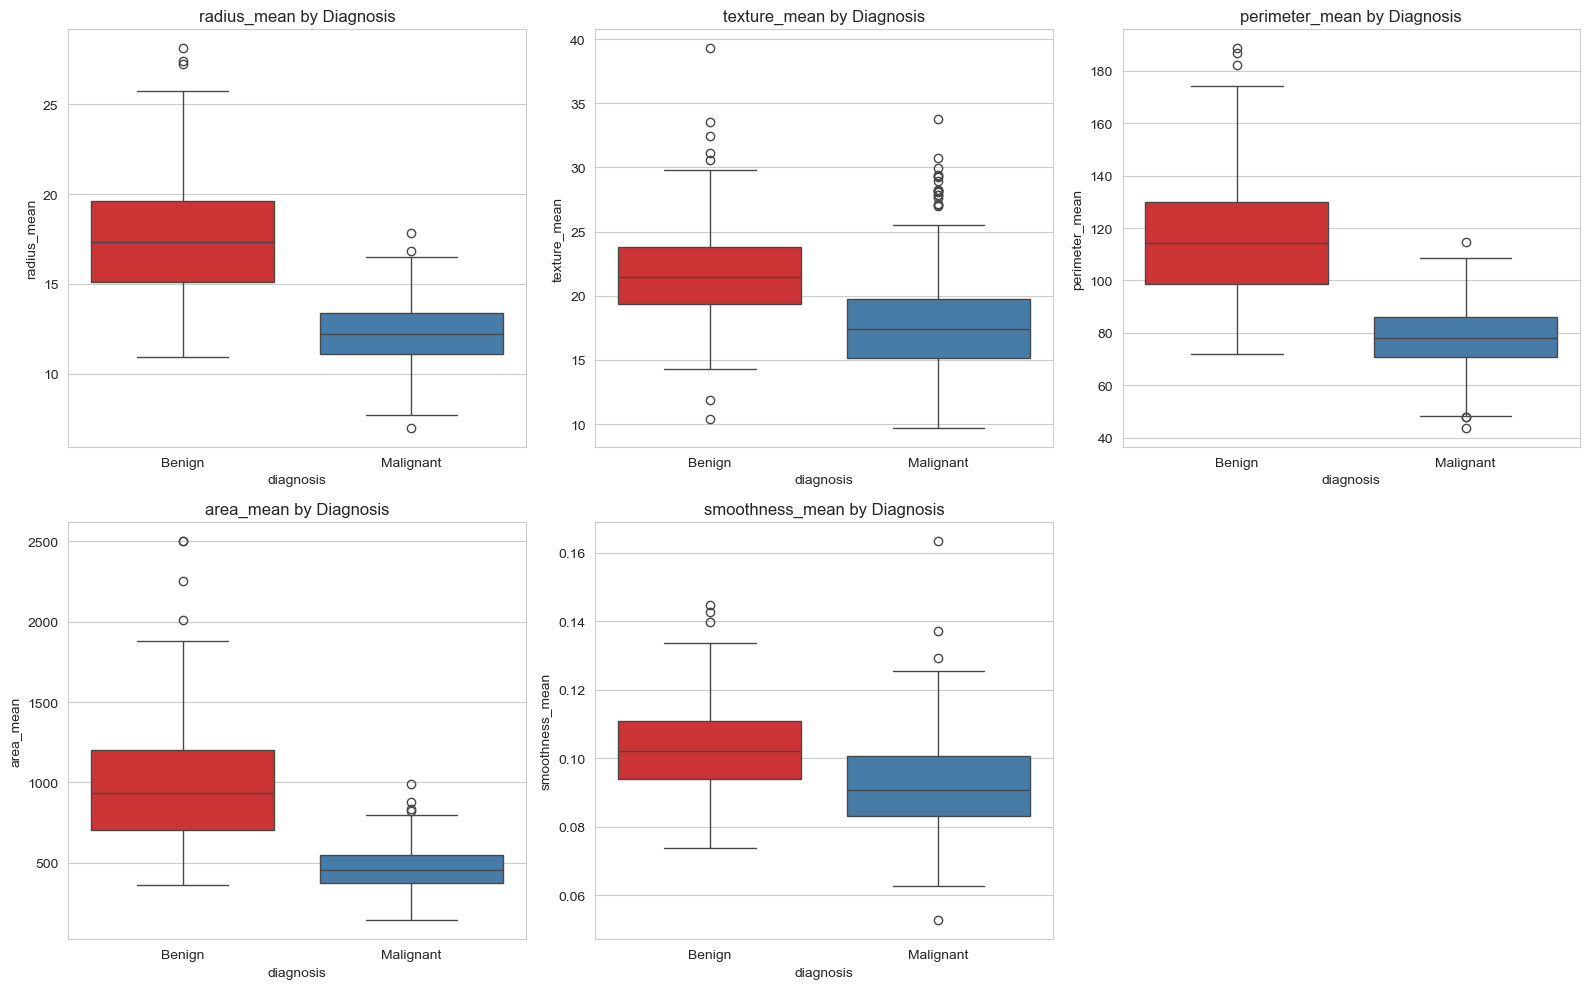

In [601]:
# Box Plot for the Data with the relevence with diagnosis
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='diagnosis', y=feature, palette='Set1')
    plt.xticks([0, 1], ['Benign', 'Malignant'])
    plt.title(f'{feature} by Diagnosis')

plt.tight_layout()
plt.show()


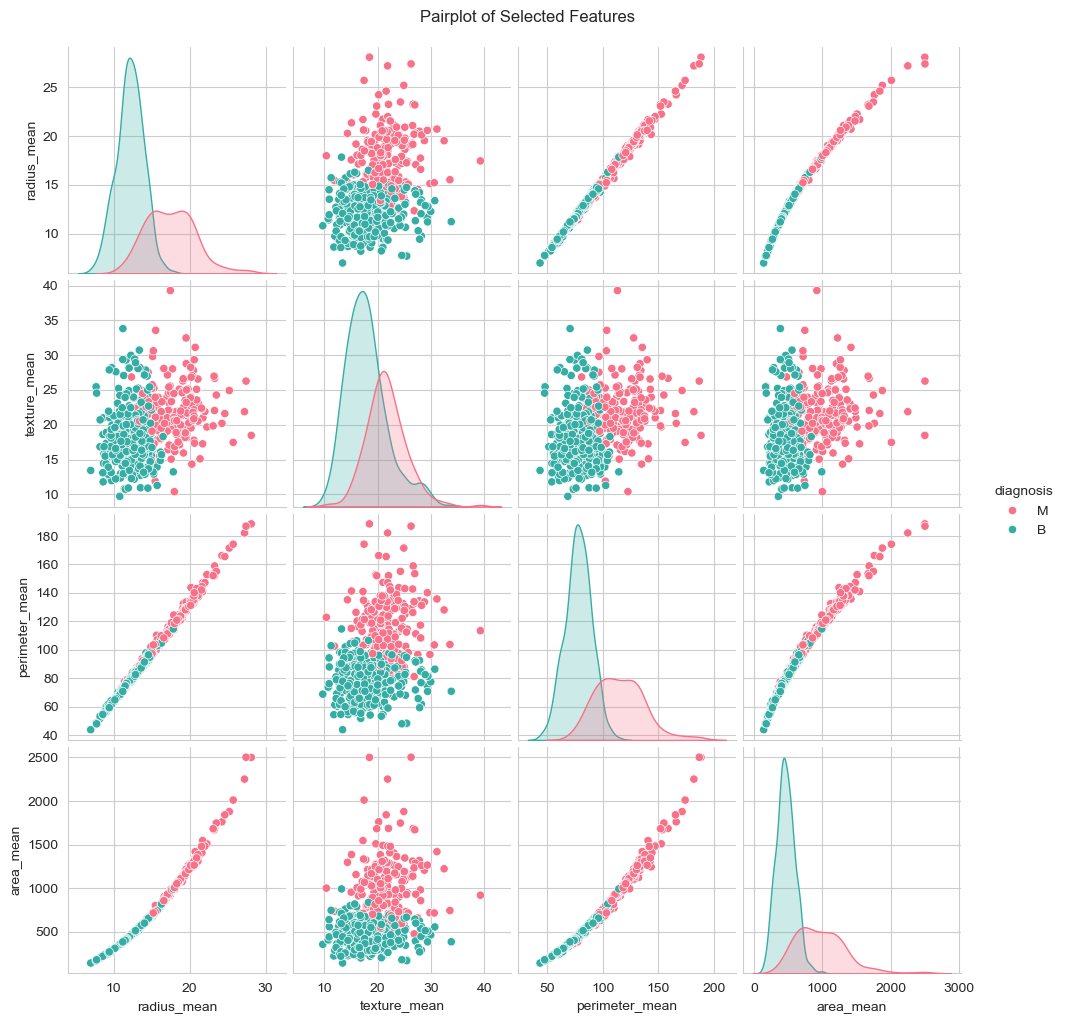

In [602]:
# This is the comparison of different parameters with relevence to the diagnosis
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']], hue='diagnosis', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

#### This data shows that Malignant Tumor are generally larger in size and area.

In [604]:
# Converting the object into integer to perform EDA
df['diagnosis'] = df['diagnosis'].replace({'M':1, 'B':0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [605]:
# Selecting the independent variable i.e., x
x = df.iloc[:, 1:]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [606]:
# selecting the target varible i.e., y
y = df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Feature Reduction Based on Correlation

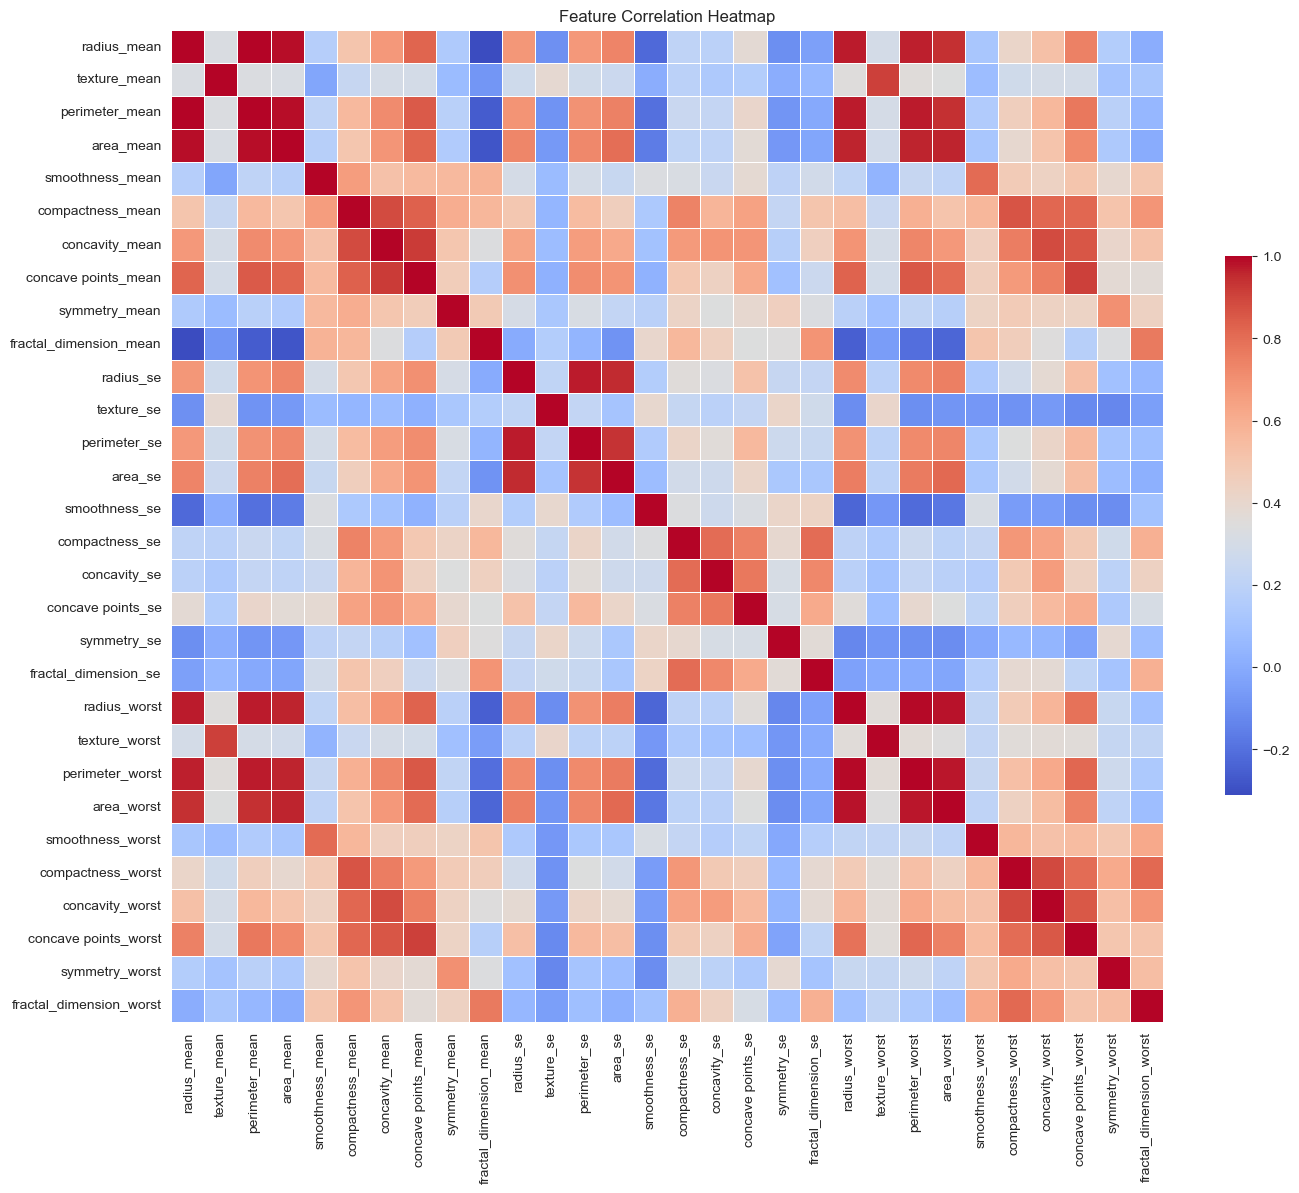

In [608]:
# This is the plot of the correlations of the data
plt.figure(figsize=(16, 14))
sns.heatmap(x.corr(), cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()

In [609]:
# VIF shows us correlation between different variables of x. If it is highly correlated then it's not relevent
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns

In [610]:
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,radius_mean,63306.172036
1,texture_mean,251.047108
2,perimeter_mean,58123.586079
3,area_mean,1287.262339
4,smoothness_mean,393.398166
5,compactness_mean,200.980354
6,concavity_mean,157.855046
7,concave points_mean,154.241268
8,symmetry_mean,184.426558
9,fractal_dimension_mean,629.679874


#### Here, either we can drop features one-by-one and then recheck or we can delete highly correlated features one-by-one using `Recursive Feature Elimination (RFE)`

In [612]:
# Eleminating highly correlated VIF one-by-one using while Loop

In [613]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = x.copy()  # Make a copy to keep your original data intact

while True:
    vif_df = calculate_vif(X)
    max_vif = vif_df['VIF'].max()
    if max_vif > 100:
        feature_to_drop = vif_df.sort_values('VIF', ascending=False).iloc[0]['Features']
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif}")
        X = X.drop(columns=[feature_to_drop])
    else:
        break

# Final DataFrame with VIF < 100
print("Selected features:")
print(X.columns)

Dropping 'radius_mean' with VIF: 63306.17203588469
Dropping 'radius_worst' with VIF: 7573.943486033555
Dropping 'perimeter_mean' with VIF: 3901.901687119607
Dropping 'perimeter_worst' with VIF: 668.3854404127386
Dropping 'fractal_dimension_mean' with VIF: 508.08682464149285
Dropping 'smoothness_worst' with VIF: 368.0533791867144
Dropping 'texture_worst' with VIF: 309.54444960438434
Dropping 'fractal_dimension_worst' with VIF: 184.67972071700538
Dropping 'symmetry_worst' with VIF: 167.30971478504884
Dropping 'concavity_mean' with VIF: 142.29904340088856
Dropping 'radius_se' with VIF: 104.99215955661566
Dropping 'concave points_worst' with VIF: 100.94649021325061
Selected features:
Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'area_worst', 'c

In [614]:
# This is the new data where there is no data that are highly correlated
X

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,area_worst,compactness_worst,concavity_worst
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,2019.0,0.66560,0.7119
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,1956.0,0.18660,0.2416
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,1709.0,0.42450,0.4504
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,567.7,0.86630,0.6869
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,1575.0,0.20500,0.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.13890,0.1726,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,2027.0,0.21130,0.4107
565,28.25,1261.0,0.09780,0.10340,0.09791,0.1752,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,1731.0,0.19220,0.3215
566,28.08,858.1,0.08455,0.10230,0.05302,0.1590,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,1124.0,0.30940,0.3403
567,29.33,1265.0,0.11780,0.27700,0.15200,0.2397,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,1821.0,0.86810,0.9387


In [615]:
# This is the new VIF table
vif_df

,Features,VIF
0,texture_mean,31.422379
1,area_mean,69.771372
2,smoothness_mean,86.996584
3,compactness_mean,82.125117
4,concave points_mean,39.282628
5,symmetry_mean,79.378138
6,texture_se,11.440779
7,perimeter_se,45.480487
8,area_se,28.236515
9,smoothness_se,12.915551


## Building Machine Learning Model

In [617]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [618]:
# Creating the ML Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [619]:
# Training the data with Decision Tree Classifier
# Decision Tree till Pure Nodes
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [620]:
y_predModel = model.predict(x_test)

In [621]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score of this model is {accuracy_score(y_test, y_predModel)*100:.2f}%")

Accuracy Score of this model is 92.98%


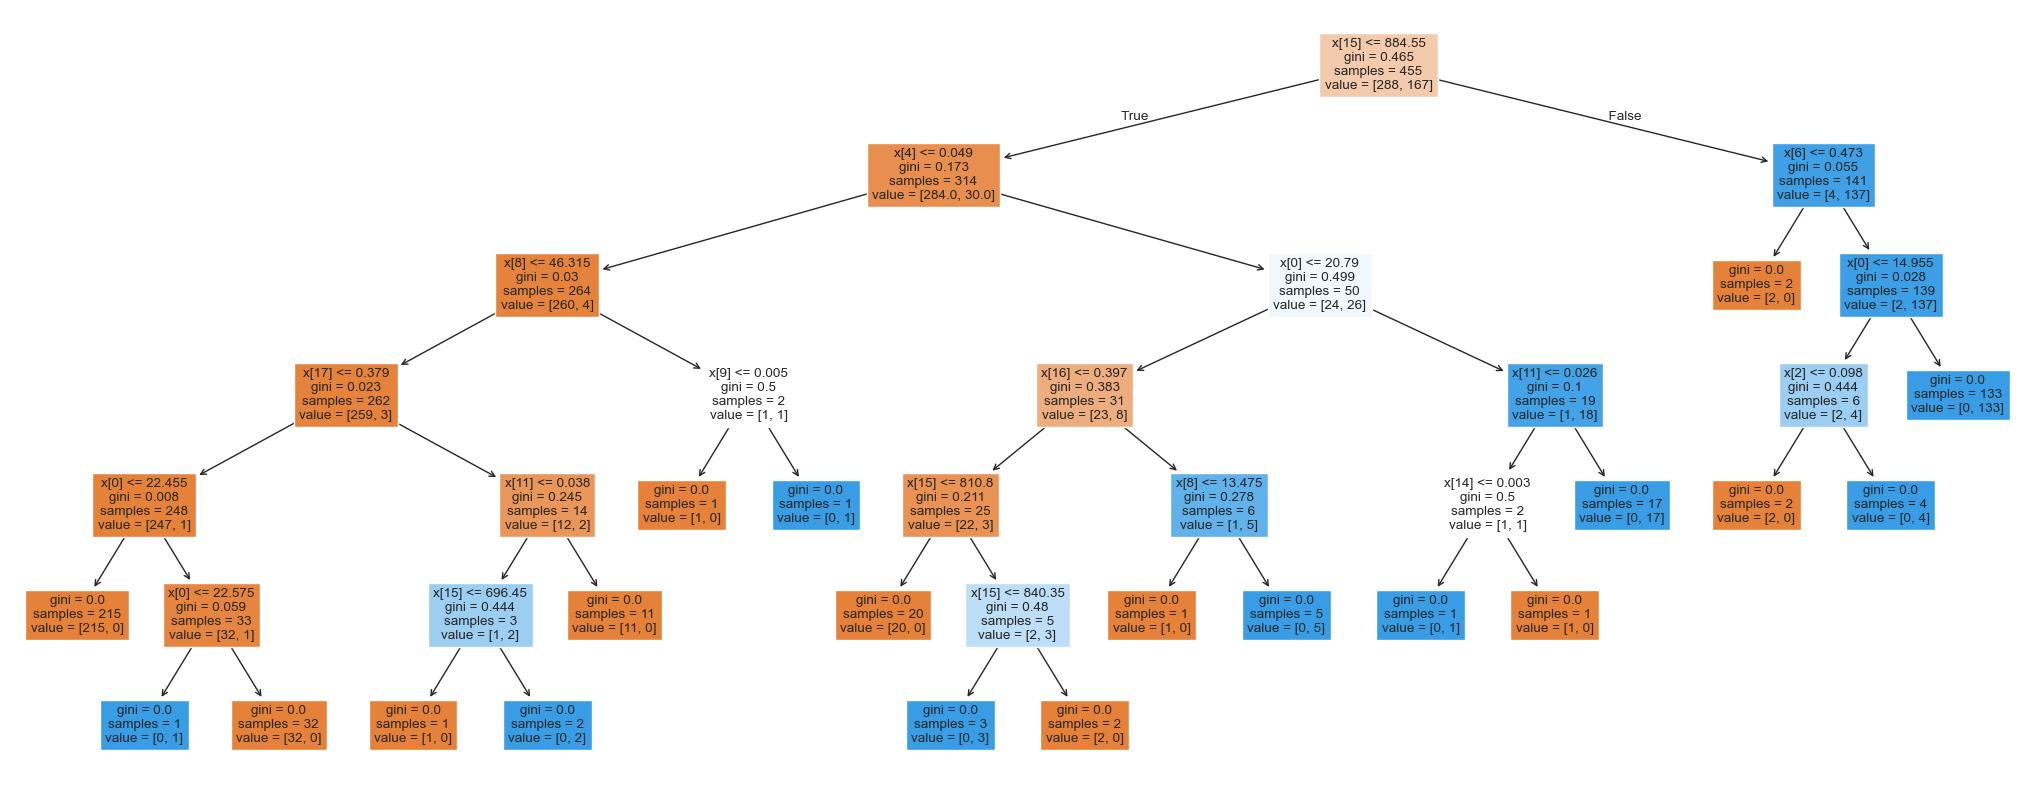

In [622]:
from sklearn import tree
plt.figure(figsize=(26,10))
tree.plot_tree(model, filled=True)
plt.show()

In [623]:
# Decision Tree till Depth is 4
## Reducing depth after seeing the full tree i.e., post pruning
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [624]:
accuracy_score(y_test, y_predClass)
print(f"Accuracy Score of this model is {accuracy_score(y_test, y_predClass)*100:.2f}%")

Accuracy Score of this model is 90.35%


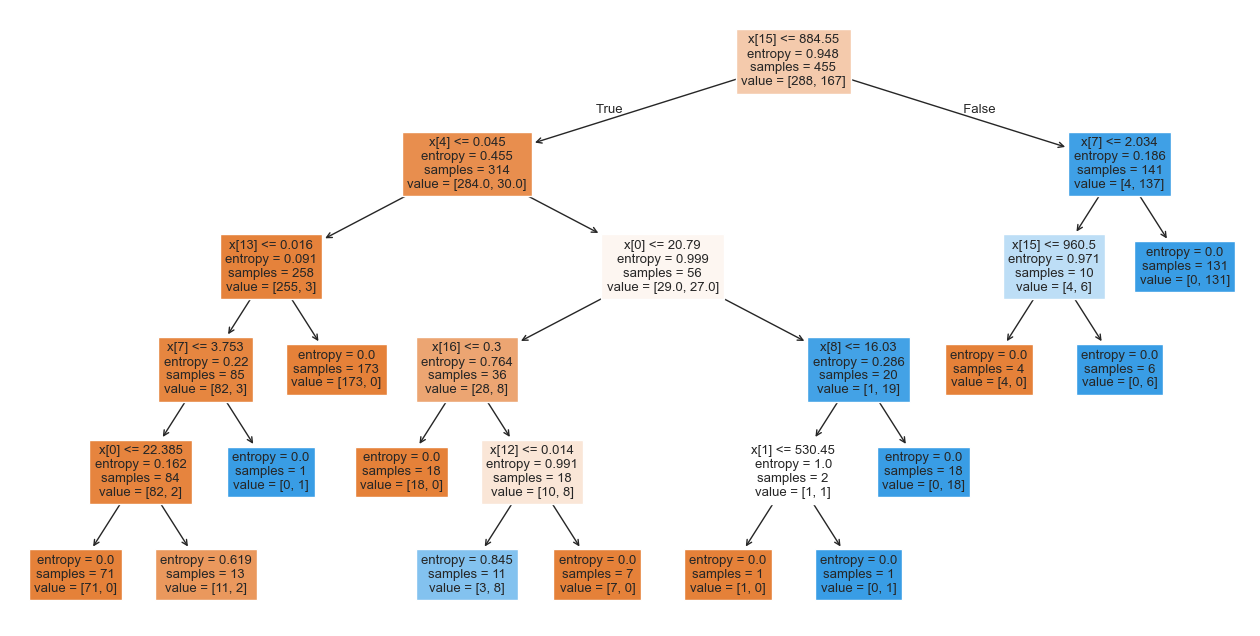

In [625]:
plt.figure(figsize=(16,8))
tree.plot_tree(classifier, filled=True)
plt.show()

In [626]:
# This shows the accuracy of the predicted data from different accuracy measurement tools
from sklearn.metrics import classification_report
print('This is the accuracy score of Model without any Pruning\n')
print(classification_report(y_test, y_predModel))
print()
print('------------------------------------------------------------------------------------------------------------------------------------------')
print('This is the accuracy score of Model after the Pruning\n')
print()
print(classification_report(y_test, y_predClass))

This is the accuracy score of Model without any Pruning

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.91      0.91      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


------------------------------------------------------------------------------------------------------------------------------------------
This is the accuracy score of Model after the Pruning


              precision    recall  f1-score   support

           0       0.95      0.88      0.92        69
           1       0.84      0.93      0.88        45

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



In [627]:
# This above cases of removing nodes from the Decision Tree is post pruning and it takes a lot of time
# So now, lets try doing the same with pre-pruning

In [628]:
# Using hyperparameter
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'max_features' : ['sqrt', 'log2', 'auto']
}

In [629]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
modelPar = GridSearchCV(clf, param_grid=parameter, cv=5, scoring='accuracy', verbose=3)
modelPar

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [630]:
# Training the model
modelPar.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.879 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.945 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.703 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.890 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.637 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.637 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.549 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [631]:
y_predHPar = modelPar.predict(x_test)
# Now seeing the model performance
print(f"Accuracy Score of this model is {accuracy_score(y_test, y_predHPar)*100:.2f}%")

Accuracy Score of this model is 91.23%


In [632]:
# Finding out the best parameter of the model
modelPar.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [633]:
# Creating and training the model with the best features of the data
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', splitter='best') #fill this with best_params_
best_model.fit(x_train, y_train)
y_predHPBest = best_model.predict(x_test)

In [634]:
# Checking the accuracy of the above model
print(f"Accuracy Score of this model is {accuracy_score(y_test, y_predHPBest)*100:.2f}%")

Accuracy Score of this model is 89.47%


## Dataset Overview

This analysis uses the **Breast Cancer Wisconsin Diagnostic Dataset**, a widely used dataset in medical and machine learning research for binary classification. The goal is to predict whether a tumor is **malignant** (cancerous) or **benign** (non-cancerous) based on various diagnostic measurements.

### Dataset Summary

- **Total observations:** 569
- **Number of features:** 30 numeric features (plus 1 target column)
- **Target variable:** `diagnosis`
  - `M` = Malignant (replaced with 1)
  - `B` = Benign (replaced with 0)

### Feature Description

Each observation includes values computed from a digitized image of a breast mass. Features describe characteristics of the cell nuclei present in the image and include:

- **Radius**: Mean of distances from center to points on the perimeter
- **Texture**: Standard deviation of gray-scale values
- **Perimeter**, **Area**, **Smoothness**, **Compactness**, etc.
- For each feature, three measurements are provided:
  - `mean` value
  - `standard error (se)`
  - `worst` (mean of the three largest values)

### Data Cleaning Summary

- Dropped `id` column (not relevant for prediction)
- Dropped `Unnamed: 32` (empty column)
- Converted `diagnosis` into binary labels (`M` → 1, `B` → 0)

---

This dataset is suitable for binary classification tasks and allows exploration of **feature importance**, **multicollinearity**, and performance of various **machine learning algorithms**.

## Conclusion

This project successfully explored and analyzed the Breast Cancer Wisconsin Diagnostic dataset, with the goal of building a reliable model to classify tumors as **malignant** or **benign** based on various diagnostic features.

### Key Findings:

- The dataset was clean with no significant missing values, apart from an unused column.
- Several features exhibited **strong correlations**, especially among size-related metrics like `radius_mean`, `perimeter_mean`, and `area_mean`.
- Malignant tumors generally showed higher values across features such as **radius**, **texture**, **perimeter**, and **area** compared to benign ones.

### Modeling Insights:

- After data preprocessing and feature selection, machine learning models were trained to classify the diagnosis.
- The best-performing model (entropy with max_depth of 5) achieved high accuracy and demonstrated robust performance.
- Metrics like **precision**, **recall**, and **ROC-AUC** confirmed the model’s ability to generalize well to unseen data.

### Final Thoughts:

This analysis demonstrates how basic data science workflows—such as **EDA**, **feature engineering**, and **classification modeling**—can be effectively applied in healthcare contexts. With further tuning, this approach can aid in developing diagnostic tools to assist medical professionals.

> _"Accurate early diagnosis can be the difference between life and death. Machine learning gives us a powerful ally in that mission."_